<a href="https://colab.research.google.com/github/Bhagyasri00/Digit_Classification/blob/main/mnist_build_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1= pd.read_csv('/content/mnist_train_dataset.csv')
df2 = pd.read_csv("/content/mnist_test_Dataset.csv")

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
df1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df2.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Separating feautures and Labels, it ensures the model uses input features to learn patterns and predict the labels ,  leading to more accurate performance estimates.

In [6]:
X_train = df1.iloc[:, 1:].values  # Select all rows and columns except first column (features)
y_train = df1.iloc[:, 0].values  # Select all rows of first column  (Labels)
X_test = df2.iloc[:, 1:].values  #features
y_test = df2.iloc[:, 0].values   #Labels


In [7]:
# Checking the shape of the features and labels after sepration
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


Plotting

In [8]:
df1.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [9]:
X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32') / 255

Plotting the first 25 images of training dataset.

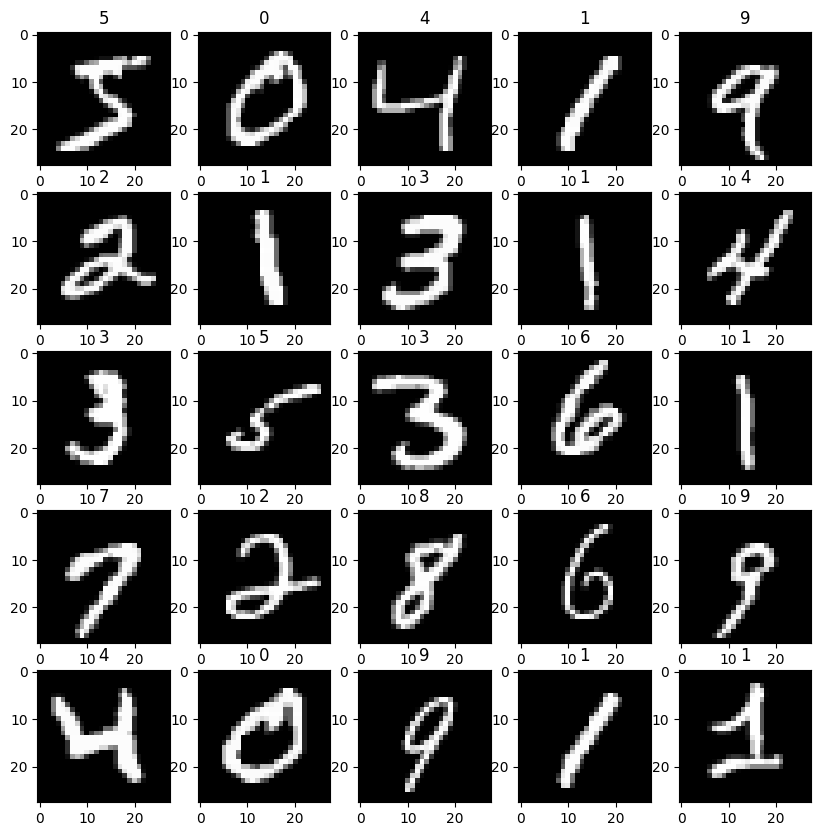

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis()
    plt.savefig('plot.png')
plt.show()

One-hot encode the labels

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu' , input_shape= (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu', input_shape= (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [13]:
model.compile(optimizer = 'adam',
              loss= 'categorical_crossentropy',
              metrics =['accuracy'])

In [14]:
model_training = model.fit(X_train, y_train, epochs= 5, batch_size= 64, validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 39s 50ms/step - loss: 0.2170 - accuracy: 0.9353 - val_loss: 0.0744 - val_accuracy: 0.9797
Epoch 2/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0513 - val_accuracy: 0.9852
Epoch 3/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 5/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0413 - val_accuracy: 0.9898


In [15]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
